# 1. 이미지 처리 기초
여기에서는 이미지 데이터를 표현하는 방식과 이미지 데이터를 처리하기 위한 파이썬 패키지인 Pillow, Scikit-Image,OpenCV 패키지에 대해 설면한다.
# 픽셀
이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 각 픽셀은 단색의 직사각형이다. 전체 이미지의 크기를 표현할 떄는 (세로픽셀수 x가로 픽셀수)형식으로 표현한다.<br>
이미지 데이터를 저장할 떄는 픽셀의 색을 표현하는 스칼라 값이나 백터를 2차원 배열로 표현한다. 파이썬에서는 NumPy의 ndarray 클래스 배열로 표현한다.
# 색공간
픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 한다. 대표적인 색공간으로는 그레이스케일(grayscale),RGB(Red-Green-Blue), HSV(Hue-Saturation-Value)방식이 있다.

## 1.1 그레이스케일
그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다. 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다. 숫자는 보통 0 ~ 255의 8비트 부호없는 정수로 저장된다.<br>
SciPy 패키지의 misc 서브 패지의 face 명령은 이미지 처리용 샘플 이미지를 제공한다. 인수로 gray=True를 입력하면 그레이스케일 이미지를 반환한다. 이미지의 크기는 배열의 shape 속성으로 볼 수 있다.

In [1]:
import scipy as sp

In [2]:
import scipy.misc 
img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

이 이미지 데이터는 768x1024 크기의 uint8  자료형 2차원 배열이다. 좌측 상단의 25개 픽셀의 데이터만 보면 다음과 같다.

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
import matplotlib as mpl
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


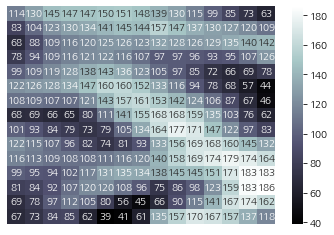

In [5]:
sns.heatmap(img_gray[:15,:15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

## 1.2 RGB
RGB 색공간에서 색은 적(Red),녹(Green),청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다. 8비트 부호없는 정수를 사용하는 경우(255,0,0)은 빨간색,(0,255,0)은 녹색, (0,0,255)는 파란색이다. <br>
픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터(세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고(세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다. 세번째 축을 색채널(channel)이라고 부른다.

In [6]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

다음 그림에서 붉은 기와는 R채널의 값이 크고 하늘은 푸른색이므로 B채널의 값이 큰것을 확인할 수 있다.

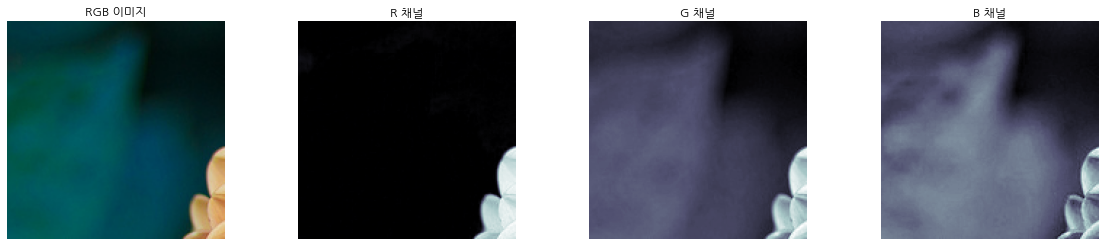

In [7]:
plt.figure(figsize=(20,4))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()

## 1.3 HSV
HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.
- 색상(Hue) : 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0도 ~ 360도의 범위를 갖고 360도와 0도는 빨강을 가리킨다.
- 채도(Saturation) : 채도값 S는 특정한 색상의 진함을 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value) : 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다. 

아래 코드는 채도가 100일 때의 색공간을 시각화 한 것이다.

In [12]:
from matplotlib.colors import hsv_to_rgb
import numpy as np

In [13]:
V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V)) 
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [14]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [15]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [16]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

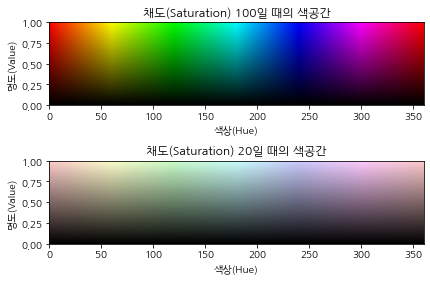

In [17]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

matplotlib 패키지의 rgb_to_hsv, hsv_to_rgb 명령을 사용하면 RGB 색공간 표현과 HSV 색공간 표현을 상호변환할 수 있다.<br>
HSV 색공간으로 표현된 파일은 imshow 명령으로 바로 볼 수 없다. 이외에도 RGB,HSV 색공간에 투명도(transparency)를 표현하는 A(Alpha) 채널이 추가된 RGBA,HSVA등의 생공간도 있다.

# 2. 이미지 파일 형식
.bmp 확장자를 가지는 비트맵(bitmap)파일은 지금까지 설명한 다차원 다차워 배열정보를 그대로 담고있다. 하지만 비트맵 파일은 파일 용량이 크기 떄문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용한다.
- JPEG : JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다.
    - 장점
        - 1. RGB 모드와 CMYK 모드를 둘 다 지원한다.
        - 2. RGB 이미지의 모든 컬러 정보를 유지한다.
        - 3. 이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있다.
    - 단점
        - 1. 투명 이미지를 지원하지 않는다.
        - 2. 압축율을 높일 수록 이미지의 질이 손상된다.
        - 3. 레이어와 알파채널을 지원하지 않는다.
- GIF : GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨서프(Compuserve)에서 개발한 포맷이다.
    - 장점
        - 1. 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있다.
        - 2. 투명 이미지를 지원한다.
        - 3. 애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있다.
    - 단점
        - 1. 8비트 256 컬러로 제한된다.

# 3. Pillow를 이용한 이미지 처리
가장 먼저 소개할 파이썬 이미지 처리 패키지는 Pillow이다. Pillow는 이전에 사용되던 PIL(Python Imaging Library)패키지를 대체하기 위한 것이다. JPEG, BPM, GIF, PNGM PPM, TIFF 등의 다양한 포맷을 지원하고 초보자가 다루기 쉽다는 장점이 있다. 여기에는 Pillow 버전 5.2를 기준으로 설명한다. PIL 패키지의 대체이므로 임포트 이름이 PIL 패키지와 같다.

In [18]:
import PIL

In [21]:
PIL.__version__

'8.4.0'

# 3.1 이미지 읽고 쓰기
우선 인터넷에서 실습을 위한 이미지 파일을 내려받자.

In [22]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2021-12-12 10:34:06--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org (www.python.org)... 151.101.108.223, 2a04:4e42:15::223
Connecting to www.python.org (www.python.org)|151.101.108.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.04s   

2021-12-12 10:34:06 (2.02 MB/s) - ‘logo.png’ saved [83564/83564]



Pillow 패키지에서 제공하는 Image 클래스를 사용하면 여러가지 다양한 포맷의 이미지를 읽고 변환하여 저장할 수 있다. open 메서드는 이미지 파일을 열 수 있다.

In [23]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

주피터 노트북에서는 Image클래스 캑체를 바로 볼 수 있다.

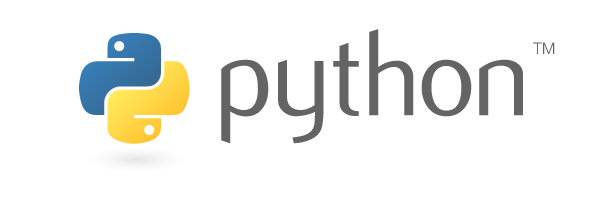

In [25]:
img_logo_png

파일로 저장할 때는 save 메서드를 사용한다. 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환하여 저장한다.

In [26]:
img_logo_png.save("logo.bmp")
img_logo_bmp = Image.open("logo.bmp")

이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용한다. NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.

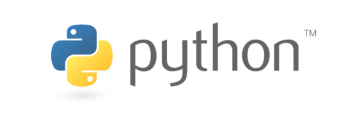

In [31]:
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

반대로 NumPy 배열을 Image 객체로 발꿀 때는 fromarray 클래스 메서드를 사용한다.

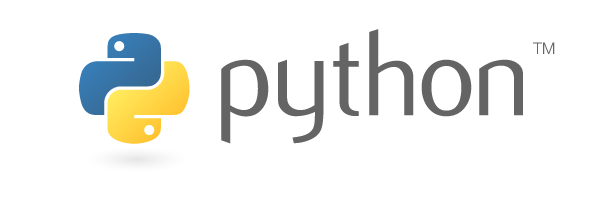

In [32]:
Image.fromarray(img_logo_array)

## 3.2 이미지 크기 변환
이미지의 크기를 확대 또는 축소하려면 resize 메서드를 사용한다. 인수로 새로운 사이즈의 튜플을 입력한다.

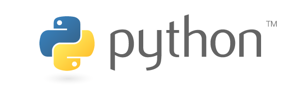

In [35]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

썸네일(thumbnail) 이미지를 만들고 싶다면 Image객체의 thumbnail 메서드를 사용한다. resize 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하지만 thumbnail 메서드는 원래 객체 자체를 바꾸는 인플레이스(in=place) 메소드이므로 주의하여 사용한다.

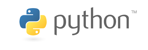

In [36]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

## 3.3 이미지 회전
이미지를 회전하기 위해서는 rotate 메서드를 호출한다. 인수로는 도(degree) 단위의 각도를 입력한다. 입력 각도만큼 반시계 방향으로 회전한다.

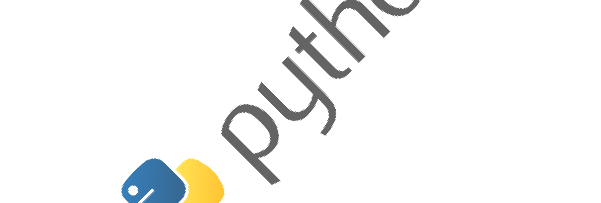

In [46]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

## 3.4 이미지 잘라내기
crop 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분(ROI: region of interest)만 추출 할 수 있다. 인수로 ROI의 좌-상의 자표, 우-하의 좌표를 받는다. 아래의 코드는 파이썬 로고이미지에서 파이썬의 마크만 잘라낸 것이다.

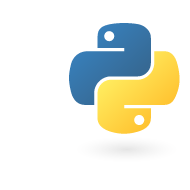

In [51]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

# 4. Scikit-image
scikit-image 패키지도 이미지 처리에 많이 사용된다. 여기에서는 0.18.1버전을 기준으로 설명한다.

In [52]:
import skimage
skimage.__version__

'0.18.1'

## 4.1 샘플이미지
Scikit-Image는 data라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 NumPy 배열 자료형으로 사용한다.

In [54]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

# 4.2 이미지 읽고 쓰기
Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 imsave, imread 명령을 사용한다. 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환한다.

In [55]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

## 4.3 색공간 변환
Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공한다.

In [57]:
from skimage import color

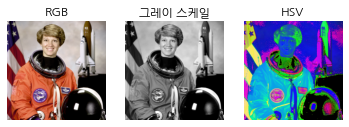

In [58]:
plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

# 5. OpenCV
OpenCV(Open Source Computer Vision)은 이미지 처리, 컴퓨터 비전을 위한 라이브러리이다. Windows, Linux, OS X(Mac OS), IOS, Android 등 다양한 플랫폼을 지원한다. 실시간 이미지 프로세싱에 중점을 둔 라이브러리이며 많은 영상처리 알고리즘을 구현해 놓았다.

In [59]:
import cv2
cv2.__version__

'4.5.4'

# 5.1 파일 읽고 쓰기
이미지를 읽을 때는 imread 메서드를 사용하는데 인수로 파일이름과 함께 flag를 넣을 수 있다.
- cv2.IMREAD_COLOR : 이미지 파일을 컬러로 읽어들인다. 투명한 부분은 무시되며, flag디폴트 값이다.
- cv2.IMREAD_GRAYSCALE : 이미지를 그레이스케일 읽어 들인다. 실제 이미지 처리시 중간단계로 많이 사용한다.
- cv2.IMREAD_UNCHANGED : 이미지파일을 알파 채널까지 포함하여 읽어 들인다.

각각 1, 0, -1 로도 표현한다.

In [60]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

OpenCV도 이미지 데이터를 NumPy 배열로 저장하지만 색 채널의 순서가  R-G-B 순서가 아니라, B-G-R 순서로 뒤바뀌어 있다는 점에 주의한다. 이렇게 만들어진 이유는 OpenCV를 개발하던 초기에는 BGR 색공간이 카메라 제조사나 소프트웨어 개발자들에게 보편적이었기 때문이다.

In [65]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])

cvtColor 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.

In [66]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

이미지 파일을 만들 때는 imwrite 명령을 사용한다.

In [68]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

## 5.2 이미지 크기 변환
resize() 명령으로 이미지 크기 변환 기능을 제공한다.

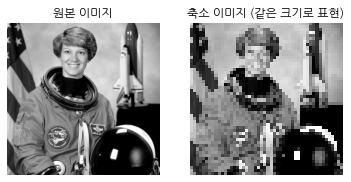

In [70]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("축소 이미지 (같은 크기로 표현)")
plt.axis("off")

plt.show()

파이썬으로 이미지 처리 기초를 다루어 보았다. 파이썬으로 이미지도 다룰수 잇는법을 몰랐는데 알고나니 만능이 아닌가 싶다. 좀더 나아가 이미지를 어떻게 더 다룰 수 있는지 좀더 알아보고 글로 적어보도록 하겠다. 

### 출처 : [[데이터 사이언스 스쿨]이미지 처리 기초](https://datascienceschool.net/03%20machine%20learning/03.02.01%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html#id14)